[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



=== Dataset Loaded Successfully ===



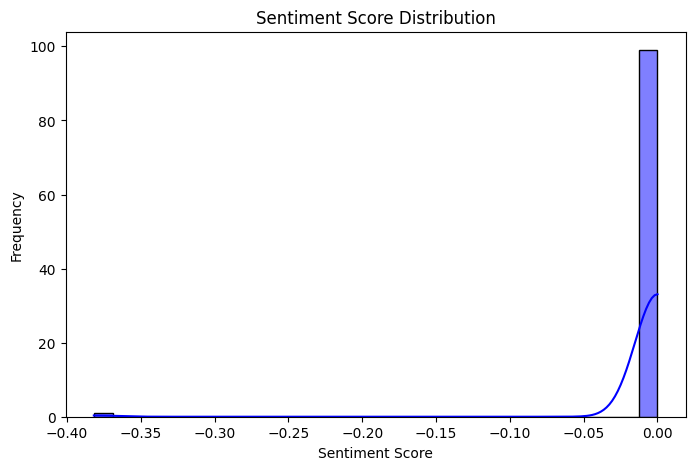

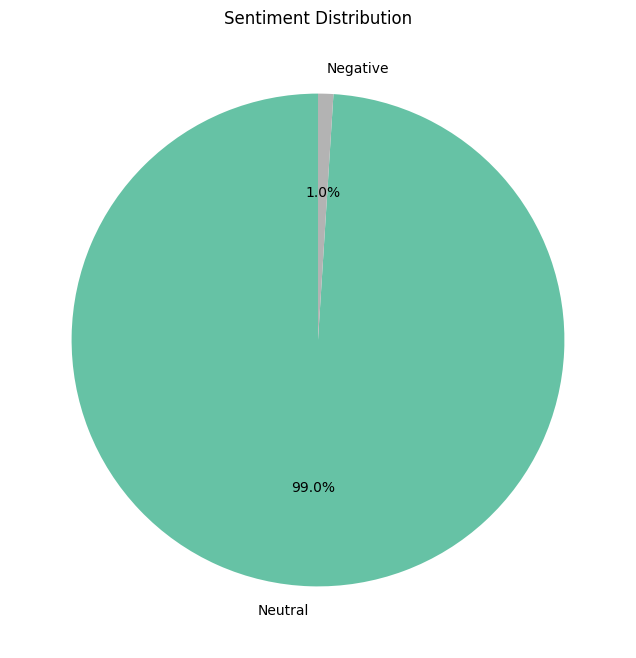


=== Sample Sentiment Analysis Results ===
                      post_content  sentiment_score sentiment
0  Sample post content 0 #hashtag0              0.0   Neutral
1  Sample post content 1 #hashtag1              0.0   Neutral
2  Sample post content 2 #hashtag2              0.0   Neutral
3  Sample post content 3 #hashtag3              0.0   Neutral
4  Sample post content 4 #hashtag4              0.0   Neutral
5  Sample post content 5 #hashtag0              0.0   Neutral
6  Sample post content 6 #hashtag1              0.0   Neutral
7  Sample post content 7 #hashtag2              0.0   Neutral
8  Sample post content 8 #hashtag3              0.0   Neutral
9  Sample post content 9 #hashtag4              0.0   Neutral

=== Sentiment Analysis Completed Successfully! ===



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER Lexicon if not available
nltk.download("vader_lexicon")

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# File path
file_path = './instagram_data.csv'
# file_path = r"C:\Users\hp\Desktop\BaveshSma\instagram_data.csv"

try:
    # Load the dataset
    df = pd.read_csv(file_path)
    print("\n=== Dataset Loaded Successfully ===\n")

    # Convert timestamp column to datetime format
    df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

    # Handle missing values
    df.fillna({"post_content": "Unknown", "likes": 0, "shares": 0, "comments": 0}, inplace=True)

    # Perform Sentiment Analysis
    def get_sentiment(text):
        sentiment_scores = sia.polarity_scores(str(text))
        return sentiment_scores["compound"]

    df["sentiment_score"] = df["post_content"].apply(get_sentiment)

    # Classify Sentiments
    def classify_sentiment(score):
        if score > 0.05:
            return "Positive"
        elif score < -0.05:
            return "Negative"
        else:
            return "Neutral"

    df["sentiment"] = df["sentiment_score"].apply(classify_sentiment)

    # 1. Sentiment Distribution
    plt.figure(figsize=(8, 5))
    sns.histplot(df["sentiment_score"], bins=30, kde=True, color="blue")
    plt.title("Sentiment Score Distribution")
    plt.xlabel("Sentiment Score")
    plt.ylabel("Frequency")
    plt.show()

    # 2. Sentiment Category Pie Chart
    plt.figure(figsize=(8, 8))
    df["sentiment"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="Set2")
    plt.title("Sentiment Distribution")
    plt.ylabel("")
    plt.show()

    # Display sample sentiment analysis
    print("\n=== Sample Sentiment Analysis Results ===")
    print(df[["post_content", "sentiment_score", "sentiment"]].head(10))

    print("\n=== Sentiment Analysis Completed Successfully! ===\n")

except Exception as e:
    print(f"An error occurred: {e}")
